<a href="https://colab.research.google.com/github/Rohit2107Raj/car_price_pridiction/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_dataset.shape

(4340, 8)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
car_dataset.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [ ]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-53-7855e1fd303f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)


In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner


In [ ]:
X = car_dataset.drop(['name','selling_price','owner'],axis=1)
Y = car_dataset['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     0            1             0
1     2007      50000     0            1             0
2     2012     100000     1            1             0
3     2017      46000     0            1             0
4     2014     141000     1            1             0
...    ...        ...   ...          ...           ...
4335  2014      80000     1            1             0
4336  2014      80000     1            1             0
4337  2009      83000     0            1             0
4338  2016      90000     1            1             0
4339  2016      40000     0            1             0

[4340 rows x 5 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
new_var = lin_reg_model.fit(X_train,Y_train)

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42707003860717474


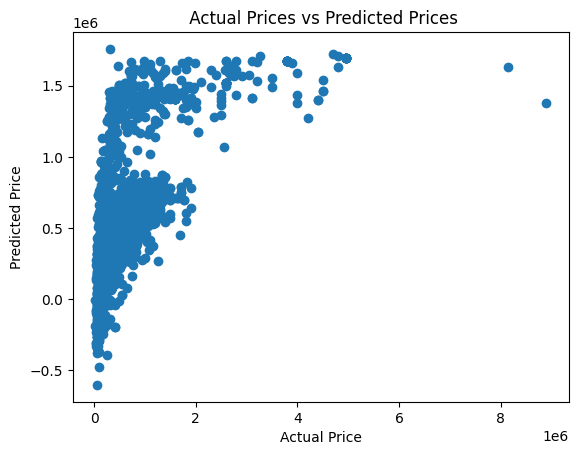

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5035628808178241


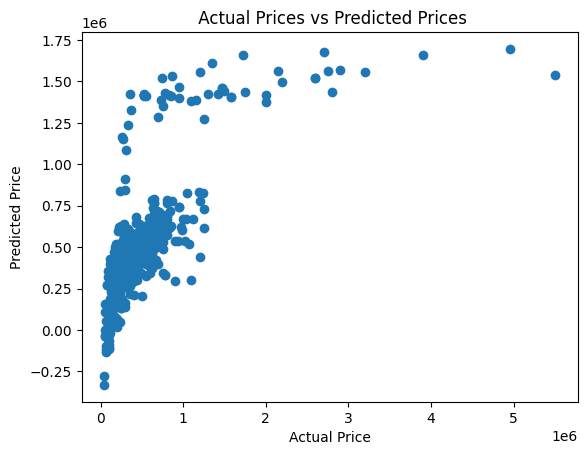

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4270700385568609


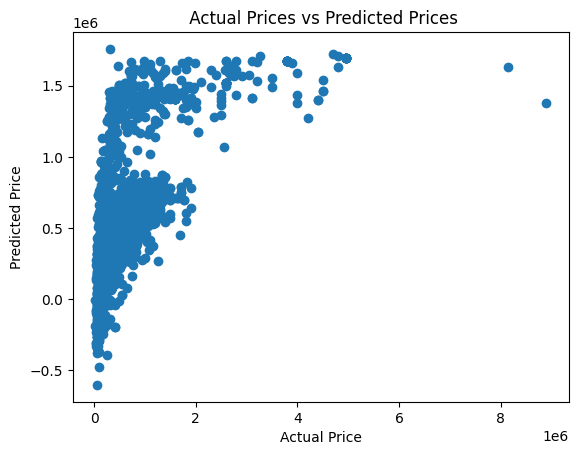

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5035622748454045


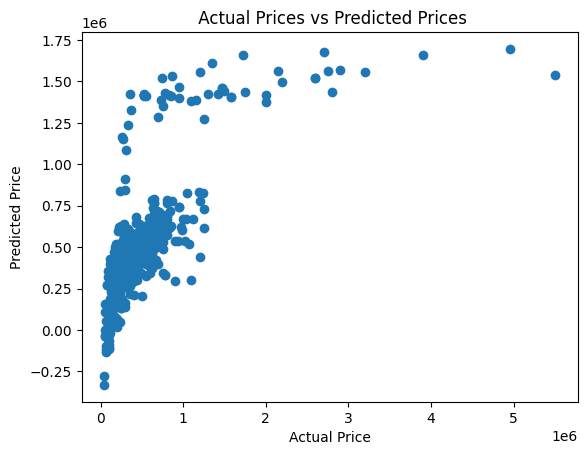

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()